In [203]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [204]:
data = pd.read_csv("Cleaned_Laptop_data.csv")

## 2. Datasets

In [205]:
#896개의 데이터, 변수는 23개
data.shape

(896, 23)

In [206]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [207]:
data.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [208]:
#old_price 예측을 목적으로 한다.
data.drop('latest_price', axis=1, inplace = True)

In [209]:
#결측치 없음
data.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [210]:
data.brand.value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

In [211]:
data.model.value_counts()

Missing     95
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     37
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 117, dtype: int64

In [212]:
data.ram_gb.value_counts()

8 GB GB     454
4 GB GB     259
16 GB GB    180
32 GB GB      3
Name: ram_gb, dtype: int64

In [213]:
data.os.value_counts()

Windows    832
DOS         36
Mac         28
Name: os, dtype: int64

In [214]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,display_size,warranty,Touchscreen,msoffice,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,ThinNlight,Missing,0,No,No,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Casual,Missing,0,No,No,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,Missing,0,No,No,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,Missing,0,No,No,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,ThinNlight,Missing,0,No,No,33490,25,3.7,1657,234


In [215]:
data.old_price

0       32790
1       21325
2       27990
3       27990
4       33490
        ...  
891    194990
892         0
893         0
894     47990
895     78400
Name: old_price, Length: 896, dtype: int64

## 3-1. 전처리

In [216]:
#old_price가 0인 행 버리기
data = data[data['old_price'] != 0]

In [217]:
# 독립변수(x), 종속변수(y) 구분
data_y = data.old_price
data.drop('old_price', axis=1, inplace=True)

<ipython-input-217-e10ea6a69be9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('old_price', axis=1, inplace=True)


In [218]:
data

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,0,ThinNlight,Missing,0,No,No,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,0,Casual,Missing,0,No,No,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,ThinNlight,Missing,0,No,No,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,ThinNlight,Missing,0,No,No,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,0,ThinNlight,Missing,0,No,No,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,LPDDR4X,1024 GB,0 GB,Windows,...,4,Casual,Missing,1,Yes,Yes,33,0.0,0,0
890,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0,Casual,16,1,No,No,21,0.0,0,0
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0,Casual,16,1,No,No,25,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,0,Casual,Missing,0,No,No,18,0.0,0,0


In [219]:
# 범주형 변수, 수치형 변수 구분
data_types = data.dtypes
data_types

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [220]:
# 수치형 변수이지만 Missing값 때문에 변수형으로 분리됨 -> Missing값 평균치로 대체
data.display_size.value_counts()

Missing    304
15.6       209
14         130
16         124
13.3        38
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [221]:
missing_indices = data['display_size'] == 'Missing'
mean_value = data.loc[~missing_indices, 'display_size'].astype(float).mean()
data.loc[missing_indices, 'display_size'] = mean_value

In [222]:
data.display_size.value_counts()

15.10502772643253    304
15.6                 209
14                   130
16                   124
13.3                  38
17.3                   9
14.96                  7
14.1                   6
13                     4
15                     3
14.2                   3
16.2                   3
12.2                   2
14.9                   1
16.1                   1
13.4                   1
Name: display_size, dtype: int64

In [223]:
data.display_size = data.display_size.astype(float)

<ipython-input-223-07da623fa4db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.display_size = data.display_size.astype(float)


In [224]:
data['ram_gb'] = data['ram_gb'].str.replace(' GB', '').astype(int)
data['ssd'] = data['ssd'].str.replace(' GB', '').astype(int)
data['hdd'] = data['hdd'].str.replace(' GB', '').astype(int)

<ipython-input-224-2ceef270e2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ram_gb'] = data['ram_gb'].str.replace(' GB', '').astype(int)
<ipython-input-224-2ceef270e2e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ssd'] = data['ssd'].str.replace(' GB', '').astype(int)
<ipython-input-224-2ceef270e2e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [225]:
missing_indices = data['processor_gnrtn'] == "Missing"
mean_value = str(int(data.loc[~missing_indices, 'processor_gnrtn'].str.replace('th', '').astype(int).mean()))
data.loc[missing_indices, 'processor_gnrtn'] = mean_value
data['processor_gnrtn'] = data['processor_gnrtn'].str.replace('th', '').astype(int)

In [226]:
# 이제 진짜 범주형 변수, 수치형 변수 구분
data_types = data.dtypes
data_types

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn      int64
ram_gb               int64
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size       float64
warranty             int64
Touchscreen         object
msoffice            object
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [227]:
numeric_vars = data_types[data_types != 'object'].index
categorical_vars = data_types[data_types == 'object'].index
data_encoded = pd.get_dummies(data, columns=categorical_vars)

In [228]:
data_encoded

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,display_size,warranty,discount,star_rating,ratings,...,os_Windows,os_bit_32-bit,os_bit_64-bit,weight_Casual,weight_Gaming,weight_ThinNlight,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,10,4,0,1024,0,15.105028,0,23,3.7,63,...,1,0,1,0,0,1,1,0,1,0
1,10,4,0,512,0,15.105028,0,8,3.6,1894,...,1,0,1,1,0,0,1,0,1,0
2,10,4,128,0,0,15.105028,0,28,3.7,1153,...,1,0,1,0,0,1,1,0,1,0
3,10,4,128,0,0,15.105028,0,23,3.7,1153,...,1,0,1,0,0,1,1,0,1,0
4,10,4,256,0,0,15.105028,0,25,3.7,1657,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,10,4,1024,0,4,15.105028,1,33,0.0,0,...,1,0,1,1,0,0,0,1,0,1
890,10,4,1024,0,0,16.000000,1,21,0.0,0,...,1,0,1,1,0,0,1,0,1,0
891,10,4,1024,0,0,16.000000,1,25,0.0,0,...,1,0,1,1,0,0,1,0,1,0
894,10,4,0,512,0,15.105028,0,18,0.0,0,...,1,1,0,1,0,0,1,0,1,0


## 3-2. 선형회귀모델

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [230]:
# 독립 변수(X)와 종속 변수(y) 분리
X = data_encoded
y = data_y

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

## 4. 평가

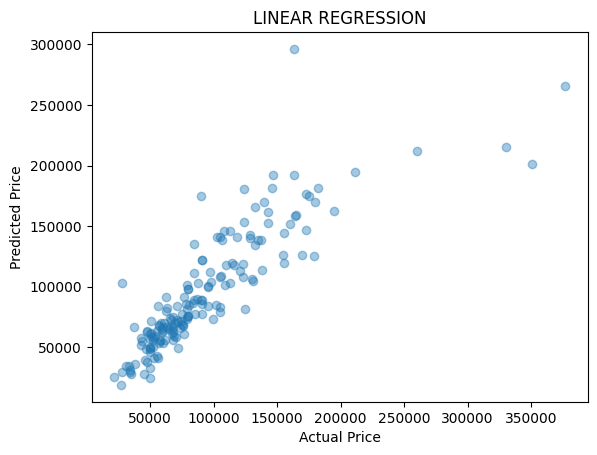

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [240]:
array1 = np.abs(y_test - y_pred)

In [241]:
#이상치 제거
array2 = array1[array1 <= 1.0e+06]

In [242]:
#평가지표: MAE
np.mean(array2 / len(array2))

98.12728179073098